## Universidade Federal do Rio Grande do Sul (UFRGS)
## Escola de Engenharia
## Programa de Pós-Graduação em Engenharia Civil
## Introdução à Teoria de Vibrações
## Aluno: William Teixeira Damé da Silva (00312137)

### Trabalho 2.2: Resposta de um sistema de múltiplos graus de liberdade submetido a uma força impulsiva


[1.   Introdução ](#section_1)

[2.   Matriz de rigidez e de massa da estrutura](#section_2)

[3.   Obtenção das frequências naturais e modos de vibração](#section_4)

[5.   Velocidade inicial aplicada no topo da estrutura](#section_5)

[6.   Resposta da estrutura a uma velocidade inicial ](#section_6)

[7.   Amortecimento de Rayleigh](#section_7) 


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.linalg as sc

## 1. Introdução <a name="section_1"></a> 




In [3]:
# Dados da estrutura

p = 400         # estimativa de carga por pavimento (kg/m^3)
pav = 10        # número de pavimentos
L = 3.5         # base da estrutura (m)
hp = 35         # altura da estrutura (m)

<img src="data/estrutura.png" width="200" height="180"/>

<center> Figura 1- Estrutura no programa Ftool

## 2. Matriz rigidez e matriz de massa da estrutura <a name="section_2"></a> 

Em cada nó foi aplicado uma força de 1 Kilo Newton, começando no topo da estrutura, e medido os deslocamentos de cada nó a partir da base. Esses dados foram dividos pela força aplicada e organizados em colunas, formando a matriz de flexibilidade de 10 X 10, conforme abaixo:

In [4]:
H = np.array([ [0.04718, 0.0466, 0.04602, 0.04544, 0.04486, 0.04428, 0.04368, 0.04294, 0.04116, 0.03121], 
               [0.1266, 0.1243, 0.122, 0.1196, 0.1173, 0.115, 0.1124, 0.1086, 0.09434, 0.04116], 
               [0.2181, 0.2128, 0.2076, 0.2024, 0.1971, 0.1917, 0.1849, 0.1674, 0.1086, 0.04294], 
               [0.318, 0.3087, 0.2994, 0.2901, 0.2806, 0.2698, 0.2481, 0.1849, 0.1124, 0.04368], 
               [0.425, 0.4105, 0.3959, 0.3812, 0.3651, 0.3383, 0.2698, 0.1917, 0.115, 0.04428],
               [0.5378, 0.5168, 0.4957, 0.4732, 0.44, 0.3651, 0.2806, 0.1971, 0.1173, 0.04486],
               [0.6552, 0.6265, 0.5965, 0.5557, 0.4732, 0.3812, 0.2901, 0.2024, 0.1196, 0.04544],
               [0.7759, 0.7371, 0.6876, 0.5965, 0.4957, 0.3959, 0.2994, 0.2076, 0.122, 0.04602],
               [0.8978, 0.8382, 0.7371, 0.6265, 0.5168, 0.4105, 0.3087, 0.2128, 0.1243, 0.0466],
               [1.011, 0.8978, 0.7759, 0.6552, 0.5378, 0.425, 0.318, 0.2181, 0.1266, 0.04718]])*1e-6


O comando abaixo foi utilizado para inverter a matriz de flexibilidade e obter a matriz de rigidez da estrutura. <center>$\mathbf{H}^{-1} = \mathbf{K}$

In [5]:
K = np.linalg.inv (H)

Foi estimado a matriz de massa da estrutura tendo como base 400kg/m³.
* A matriz de massa está invertida pois a as colunas dos deslocamentos foi obtida da base para o topo, enquanto a força se deslocava do topo para a base

In [6]:
mpav = ((L**2)*hp*p)/pav    # Carga por pavimento (kg)

In [7]:
M = np.array ([[0, 0, 0, 0, 0, 0, 0, 0, 0, 17.15],
              [0, 0, 0, 0, 0, 0, 0, 0, 17.15, 0],
              [0, 0, 0, 0, 0, 0, 0, 17.15, 0, 0],
              [0, 0, 0, 0, 0, 0, 17.15, 0, 0, 0],
              [0, 0, 0, 0, 0, 17.15, 0, 0, 0, 0],
              [0, 0, 0, 0, 17.15, 0, 0, 0, 0, 0],
              [0, 0, 0, 17.15, 0, 0, 0, 0, 0, 0],
              [0, 0, 17.15, 0, 0, 0, 0, 0, 0, 0],
              [0, 17.15, 0, 0, 0, 0, 0, 0, 0, 0],
              [17.15, 0, 0, 0, 0, 0, 0, 0, 0, 0]])*1e3

## 3. Obtenção das frequências naturais e modos de vibração <a name="section_4"></a> 

Resolvendo os autovalores e autovetores para as 4 primeiras frequências naturais $\left( \omega_k, \vec{\varphi}_k \right)$:

$$ \mathbf{K} \, \vec{\varphi}_k = \omega_k^2 \, \mathbf{M} \, \vec{\varphi}_k  $$  




In [31]:
# Autovetores e autovalores

w2, phi = sc.eig(K, M)

# colocando os autovalores em ordem crescente

iw   = w2.argsort()
w2  = w2[iw]
phi = phi[:,iw]

# convertendos os autovalores em frequências (Hz)

wk  = np.sqrt(np.real(w2)) 
fk  = wk/2/np.pi

# frequências naturais organizadas em ordem crescente (Hz)

print(fk)

[ 0.62259343  2.00267354  3.72208089  5.45922903  7.36064617  9.31864231
 11.33052726 13.18021846 14.73802487 15.72453055]


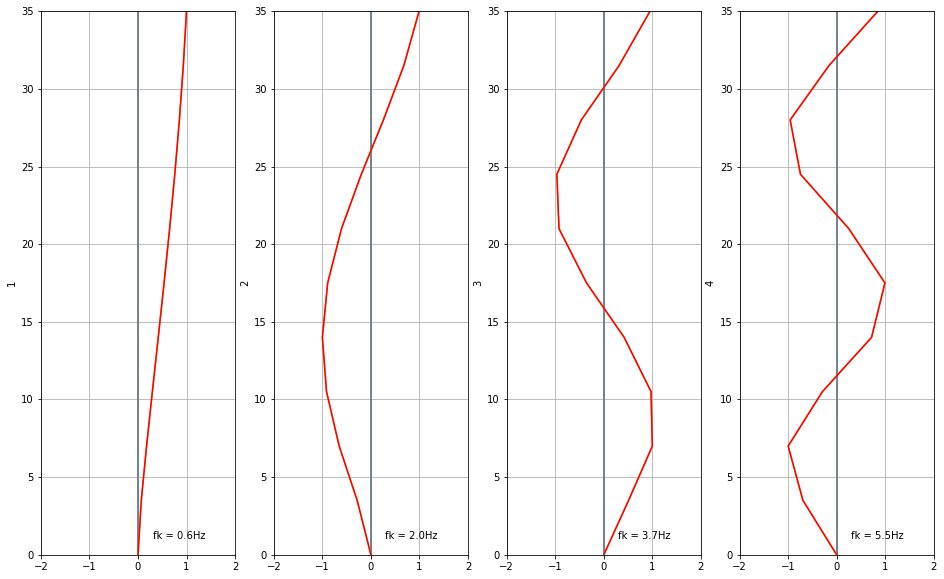

In [32]:
# plotando as deformações - modos de vibração

plt.figure(1, figsize=(16,10))

h = np.arange(0, 42, 3.5)      # ajuste de escala
x = np.zeros(h.shape)

for k in range(4):
    pk = np.zeros(12)
    pk[1:-1] = phi[:,k]
    pk /= np.max(np.abs(pk))   # ajuste de escala
    
    plt.subplot(1,4,k+1)
    plt.plot(x, h)
    plt.plot(x, h, 'k', color='grey')

    plt.plot(pk, h)
    plt.plot(pk, h, color='red')
    
    plt.xlim(-2, 2);  plt.ylabel(str(k+1));
    plt.ylim( 0.0, hp);
    plt.text( 0.3, 1.0, 'fk = {0:3.1f}Hz'.format(fk[k]));
    plt.grid(True)
    

## 4. Velocidade inicial aplicada no topo da estrutura <a name="section_5"></a> 

Foi utilizado a quarta maior frequência entre os 4 modos pedidos para o calculo da velocidade inicial


In [33]:
f_min = fk[3]             # maior frequências das 4 extraídas (Hz)
f0 = 50000                # força escolhida para aplicação
Tn = 1/f_min              # período em função de fmax (s)
td = Tn/4                 # td em função do perído (s)        
v0 = (f0*td)/mpav         # velocidade inicial aplicada no topo (m/s)

v0=[0, 0 , 0, 0, 0, 0, 0, 0, 0, v0]

uo =np.zeros(10)

print(v0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.13351023914125984]


## 6. Resposta da estrutura a uma velocidade inicial <a name="section_6"></a> 

Aplicou-se a velocidade no topo da estrutura. Com isso obteve-se os resultados abaixo:

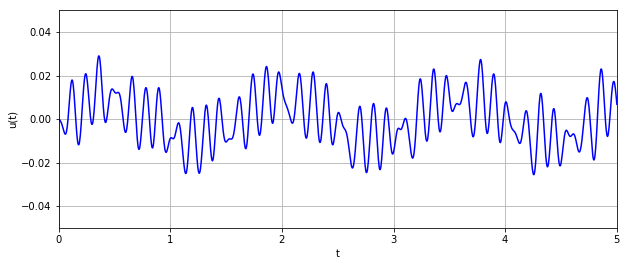

In [34]:
phit = phi.transpose()
    
    
Oi =  (np.pi)/2                                # Ângulo
Umax =np.zeros(10)                             # Vetor dos deslocamentos máximos

for k in range (10):
    Mi=np.dot(np.dot(phit[k], M), phi[k])      # Cálculo da massa modal Mi através da multiplicação de matrizes
    u_max = (np.dot(np.dot(phit[k], M),v0)) /  (wk[k] * np.sin(-Oi)* Mi) # Amplitudes máximas
    Umax[k]=u_max

t = np.linspace(0,10,3000)                     # Vetor do tempo.
uk = np.zeros((10, 3000))                      # Matriz 10x3000 para receber os valores de deslocamentos

for k in range(10):
    
    uk[k,:] = Umax[k]*np.cos(wk[k]*t - Oi)
    u = np.dot(phi, uk)         

plt.figure(2, figsize=(10,4))
plt.plot(t,u[9,:], color='blue')               #plotando o 10º nó 
plt.xlim( 0.0, 5.0); plt.xlabel("t");
plt.ylim(-0.05,0.05);  plt.ylabel("u(t)");
plt.grid(True)

## 7. Amortecimento <a name="section_7"></a> 

Cálculo do amortecimentos para as 4 primeiras frequências naturais

In [37]:
zet =np.zeros(10)  
zet[0] = 0.01
zet[1] = 0.01

alfa1 = (zet[1]*wk[1]-zet[0]*wk[0])/(wk[1]**2+wk[1]**2)
alfa0 = 2*zet[0]*wk[0]-alfa1*wk[0]**2

for k in range (8):
    zet[k+2] = alfa0/(2*wk[k+2])+(alfa1*wk[k+2]/2)
print(zet)

print('Os coeficientes alfa 0 e alfa 1 são:')
print(alfa0, alfa1)

[0.01       0.01       0.00478503 0.00577566 0.00713252 0.00864868
 0.01026712 0.01178533 0.01307818 0.01390174]
Os coeficientes alfa 0 e alfa 1 são:
0.0740471185923853 0.0002738256418360282


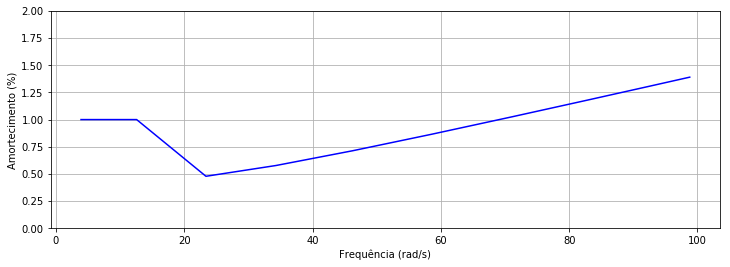

In [41]:
plt.figure(3, figsize=(12,4))
plt.plot(wk,zet*100, color='blue'); plt.xlabel('Frequência (rad/s)'); plt.ylabel('Amortecimento (%)')
plt.ylim(0,2)
plt.grid(True)
